# Project 4: Wine Classification

In [39]:
# Add all the necessary imports here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Introduction

As you might know, some fancy people have standards when it comes to wine. They insist that not all fermented grape juice is equal. In this project, we will try to predict whether a wine will be "good" or not based on a number of measurements.

Let us start by downloading the relevant datasets: one for red wine and another for white.

In [40]:
# The two URL's for the datasets:
url_red_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Load the dataset by reading the CSV into a data structure. Notice the "sep" parameter in the function.
# Why is it there?

red_wine_data = pd.read_csv(url_red_wine, sep = ';');
white_wine_data = pd.read_csv(url_white_wine, sep = ';');

### Question 1

Now that the data is loaded, show the first 10 entries in each of the two datasets. Remeber, when we use *pandas* to read the data, the output is a dataframe which has all kinds of convenient functions.

In [41]:
red_wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [42]:
white_wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


We can see the first 10 entries in both datasets using the `head` method. There are 12 columns in each dataset containing numerical data. 

Each of the data sets has samples of wine with corresponding measurements and a "quality" label ranging from 1 to 10.

### Question 2:

For each of the datasets, show the count for each quality score. Think of a good way of presenting it so the reader can quickly see how the scores are distributed. *Hint: You need to look only at the quality column for each dataset and find out how many times each number shows up.*

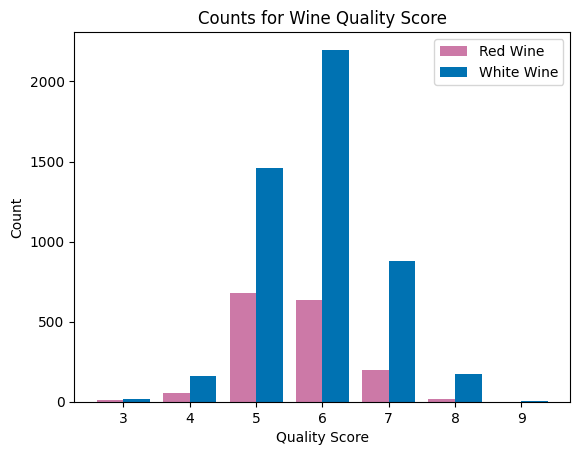

In [43]:
red_counts = red_wine_data.groupby("quality").size()
red_counts = pd.concat([red_counts, pd.Series([0], index=[9])]) 
white_counts = white_wine_data.groupby("quality").size()

labels = red_counts.index
w = 0.4
hw = w / 2

fig, ax = plt.subplots(1, 1)
ax.bar(labels - hw, red_counts, width = w, color = CF_red, label = "Red Wine")
ax.bar(labels + hw, white_counts, width = w, color = CF_blue, label = "White Wine")
ax.set(xlabel = "Quality Score", ylabel = "Count", title = "Counts for Wine Quality Score")
ax.legend()

We can present the count of each quality score as a bar graph. This will allow us to quickly see how the scores are distributed. We can also combine the two datasets into one and show the count of each quality score for both red and white wines.

We would like to be able to classify our wines as "good" (quality 7 or above) or "not" (otherwise).

## Data Preprocessing

### Question 3

Add a column to both datasets that labels the wine as good or not. Remember, later on we will want to use this label in our neural networks so think of how to make it computationally friendly.
*Hint: Take a look here https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns*

In [44]:
red_wine_data["good quality"] = red_wine_data.apply(lambda x: x["quality"] >= 7, axis=1)
white_wine_data["good quality"] = white_wine_data.apply(lambda x: x["quality"] >= 7, axis=1)

Here we can easily add the new label column using the `apply` method and a `lambda` function to check if the quality is greater than or equal to 7.

### Question 4

The next step is to create the training and the test sets. Here, we will use 75% of the datasets for training and the remaining portion for testing.

#### (a)

We don't know whether the items in the table are arranged in any way. Shuffle them. *Hint: search 'pandas shuffle'. Look at the stackoverflow result.*

In [45]:
red_wine_data = red_wine_data.sample(frac = 1).reset_index(drop = True)
white_wine_data = white_wine_data.sample(frac = 1).reset_index(drop = True)

#### (b)
Take 75% of the datasets to create the training sets. Use the remaining data for the test sets. *Hint: look at how we did this for the Iris dataset*

In [46]:
train_amount_red = int(0.75 * len(red_wine_data))
train_red_wine = red_wine_data.head(train_amount_red)
test_red_wine = red_wine_data.tail(len(red_wine_data) - train_amount_red)

In [47]:
train_amount_white = int(0.75 * len(white_wine_data))
train_white_wine = white_wine_data.head(train_amount_white)
test_white_wine = white_wine_data.tail(len(white_wine_data) - train_amount_white)

We can shuffle the data using the `sample` method and then split the data into training and test sets using the `head` and `tail` methods.

### Question 5

For all the dataseta, create the "measurements" sets and the corresponding labels. You should have 8 items in total: measurements + labels for training and testing for two wine types.

In [48]:
train_red_wine_measurements = train_red_wine.drop(["quality", "good quality"], axis = 1).values
train_red_wine_labels = train_red_wine["good quality"]

test_red_wine_measurements = test_red_wine.drop(["quality", "good quality"], axis = 1).values
test_red_wine_labels = test_red_wine["good quality"]

train_white_wine_measurements = train_white_wine.drop(["quality", "good quality"], axis = 1).values
train_white_wine_labels = train_white_wine["good quality"]

test_white_wine_measurements = test_white_wine.drop(["quality", "good quality"], axis = 1).values
test_white_wine_labels = test_white_wine["good quality"]

To get the measurements sets we can use the `drop` method to remove the "quality" and "good quality" columns. We can then get the labels by simply selecting the "good quality" column.

## Model Training

### Question 6

Create and compile two models using keras: one for red wine, another for white. The architecture is up to you. What is the smallest network you need to get decent results?

In [49]:
red_wine_model = keras.Sequential([
    keras.layers.Dense(8, activation = "sigmoid"),
    keras.layers.Dense(2, activation = "softmax") 
])

white_wine_model = keras.Sequential([
    keras.layers.Dense(8, activation = "sigmoid"),
    keras.layers.Dense(2, activation = "softmax") 
])

red_wine_model.compile(optimizer = 'adam',
                       loss = 'sparse_categorical_crossentropy',
                       metrics = ['accuracy'])

white_wine_model.compile(optimizer = 'adam',
                         loss = 'sparse_categorical_crossentropy',
                         metrics = ['accuracy'])

We create the two models using the `Sequential` class and add a few layers to each model. We can use the `Dense` class to add fully connected layers. 
The first layer uses the `Sigmoid` activation function and the second layer uses the `Softmax` activation function. We can compile the model using the `compile` method and specify the loss function and optimizer. We use the "accuracy" metric to evaluate the model.

The smallest size for the first layer that provided good results was 8. Additionally, the last layer contains two nodes since our predictions have two classes (good and not good).

### Question 7:

Train the models. How well to they perform on the training and test data?

In [50]:
red_wine_model.fit(train_red_wine_measurements, train_red_wine_labels, epochs = 3)
red_test_loss, red_test_acc = red_wine_model.evaluate(test_red_wine_measurements, test_red_wine_labels)

white_wine_model.fit(train_white_wine_measurements, train_white_wine_labels, epochs = 3)
white_test_loss, white_test_acc = white_wine_model.evaluate(test_white_wine_measurements, test_white_wine_labels)

print('Red Wine Test accuracy:', red_test_acc)
print('White Wine Test accuracy:', white_test_acc)

Epoch 1/3


38/38 [==============================] - 0s 971us/step - loss: 0.4663 - accuracy: 0.8574
Epoch 2/3
38/38 [==============================] - 0s 959us/step - loss: 0.4323 - accuracy: 0.8574
Epoch 3/3
13/13 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8850
Epoch 1/3
115/115 [==============================] - 0s 969us/step - loss: 0.6594 - accuracy: 0.6169
Epoch 2/3
115/115 [==============================] - 0s 963us/step - loss: 0.5280 - accuracy: 0.7830
Epoch 3/3
39/39 [==============================] - 0s 889us/step - loss: 0.5219 - accuracy: 0.7853
Red Wine Test accuracy: 0.8849999904632568
White Wine Test accuracy: 0.7853060960769653


We train the models using the `fit` method and provide the training data and labels and the number of epochs. We can then evaluate the models using the `evaluate` method on the test data and labels. We see that the red wine model has an accuracy or 88% and the white wine model has an accuracy of 79% on the testing data.

## Question 8:

How do you know you are not overfitting/underfitting
Explain why over/underfitting would be a problem

We know that we are not overfitting because the accuracy on the test data is similar to the accuracy on the training data. If the accuracy on the test data was much lower than the accuracy on the training data, then we would be overfitting. 

Overfitting is a problem because this means that the model would not generalize well to new data. On the other hand, underfitting means that our model has not been able to capture the underlying patterns in the data.

## Question 9:

Accuracy does not give the full picture. Analyze your predictions based on other evaluation metrics: **precision** and **recall**. Compare and contrast the two metrics. What do their scores tell you about your model results and how it can be improved?

In [51]:
red_test_predictions = np.argmax(red_wine_model.predict(test_red_wine_measurements), axis=-1)
red_precision = precision_score(test_red_wine_labels, red_test_predictions, average='weighted')
red_recall = recall_score(test_red_wine_labels, red_test_predictions, average='weighted')

white_test_predictions = np.argmax(white_wine_model.predict(test_white_wine_measurements), axis=-1)
white_precision = precision_score(test_white_wine_labels, white_test_predictions, average='weighted')
white_recall = recall_score(test_white_wine_labels, white_test_predictions, average='weighted')

print(f"Red Wine Precision: {red_precision}, Recall: {red_recall}")
print(f"White Wine Precision: {white_precision}, Recall: {white_recall}")

39/39 [==============================] - 0s 791us/step
Red Wine Precision: 0.7832250000000001, Recall: 0.885
White Wine Precision: 0.6167057059558517, Recall: 0.7853061224489796


/home/vibilanj/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/vibilanj/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision and recall metrics give us a better idea of how well our model is performing. Precision measures the proportion of predicted positive cases that are actually positive. It answers the question: "Of all the items we predicted as positive, how many are actually positive?" In this example, it measures how many of the wines we predicted as "good" are actually "good". Recall measures the proportion of actual positive cases that we correctly identified by the model. It answers the question: "Of all the actual positive cases, how many did we correctly identify?" In this example, it measueres how many of the actual "good" wines we correctly identified as "good".

For both red wine and white wine models, the recall was higher than the precision. This means that it is better at correctly identifying positive instances (i.e., true positives) among all the actual positive instances in the dataset. However, it may also be identifying some negative instances as positive (i.e., false positives), which lowers the precision. So, the model is good at identifying "good" wines but might be incorrectly identifying some "not good" wines as "good".

## Question 10:

How do you think you precision and recall results would change based on the proportional breakdown between "good" and "bad" wines in your datasets? How would you solve the problem of an imbalanced dataset? *Hint: imagine your dataset only has good/bad wines and your model becomes great at predicting only one category. Google "imbalanced datasets".* 

**You do not need to implement the different scenarios or the fix. Simply provide a discussion.**

The precision and recall results would change based on the proportional breakdown between "good" and "bad" wines in the datasets. If the dataset has more "good" wines than "bad" wines, then the model would be better at predicting "good" wines. This would result in a higher recall and lower precision. On the other hand, if the dataset has more "bad" wines than "good" wines, then the model would be better at predicting "bad" wines. This would result in a higher precision and lower recall.

A way we could solve this problem is by picking a subset of the data that has an equal number of "good" and "bad" wines for training. This would ensure that the model is not biased towards one class. These techniques are known as resampling methods and include oversampling and undersampling. Oversampling involves increasing the number of instances in the minority class, while undersampling involves decreasing the number of instances in the majority class. Another technique is to use a different evaluation metric that is robust to imbalanced datasets, such as the F1 score or the area under the ROC curve. These metrics take into account both precision and recall and provide a more balanced view of the model's performance.